In [1]:
#import the packages
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px


In [ ]:
#loading the data
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')
df

In [ ]:
#explore and inspect the data
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [42]:
df.shape

(22699, 18)

In [14]:
df.size

408582

In [ ]:
#Data visualisation
#convert the `date` column to `datetime` data type
df.dtypes

In [5]:
#covert `date` to `datetime` data type
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [ ]:
df.dtypes

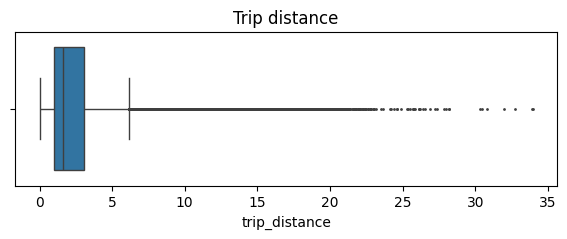

In [7]:
#create a boxplot
plt.figure(figsize=(7,2))
plt.title('Trip distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

Text(0.5, 1.0, 'Trip distance histogram')

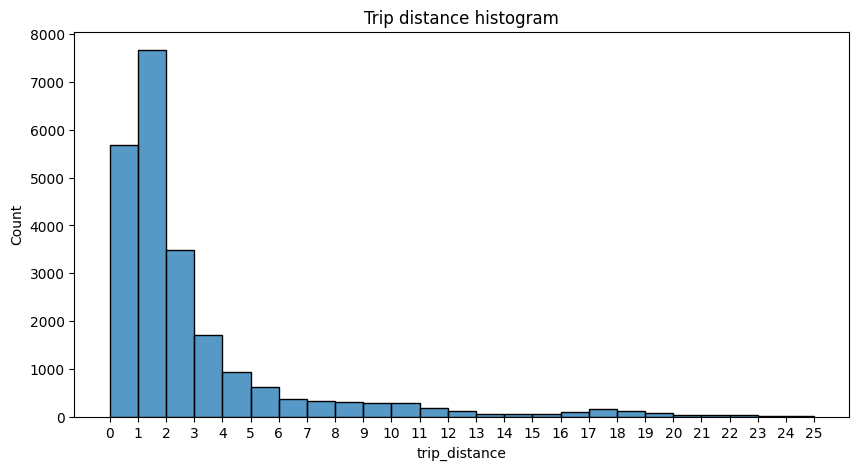

In [8]:
#Histogram for the `trip_distance`
plt.figure(figsize=(10,5))
ax = sns.histplot(df['trip_distance'], bins=range(0,26,1))
ax.set_xticks(range(0,26,1))
ax.set_xticklabels(range(0,26,1))
plt.title('Trip distance histogram')

In [ ]:
#observation
#1. Majority of trips are in distance of less than 2miles
#2. Trips reduce as the distance stretches beyond 2 miles

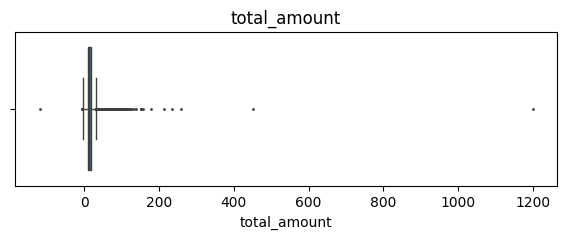

In [9]:
#total amount boxplot
#shows the distribution of the amount collected in card payment
plt.figure(figsize=(7,2))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1);

Text(0.5, 1.0, 'Total card amount histogram')

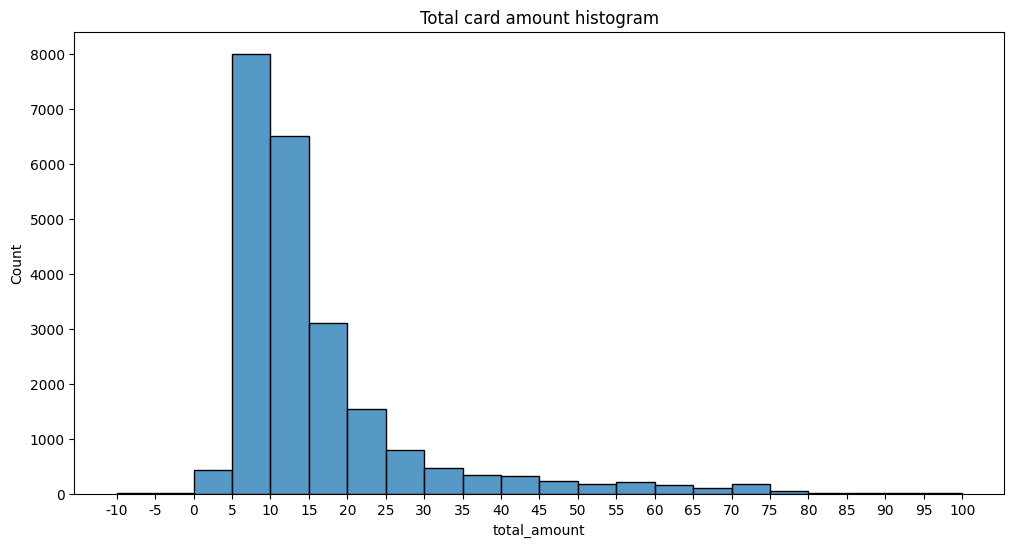

In [10]:
#Histogram for the `total_amount`
plt.figure(figsize=(12,6))
ax = sns.histplot(df['total_amount'], bins=range(-10, 101, 5))
ax.set_xticks(range(-10, 101, 5))
ax.set_xticklabels(range(-10, 101, 5))
plt.title('Total card amount histogram')

In [ ]:
#observations
#1. The popular amount is $5-15
#2. As the amount increases the total count decreases(amount and count is inversly proportional)

Text(0.5, 1.0, 'Tip Amount Box Plot')

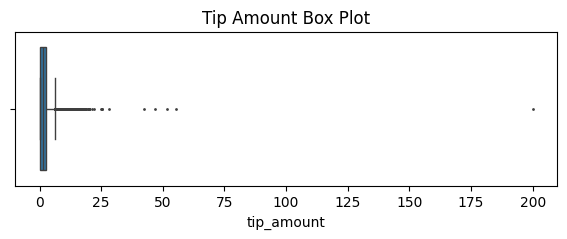

In [11]:
#tip_amount boxplot
plt.figure(figsize=(7,2))
sns.boxplot(data=None, x=df['tip_amount'], fliersize=1)
plt.title('Tip Amount Box Plot')

Text(0.5, 1.0, 'Tip Amount Histogram Plot')

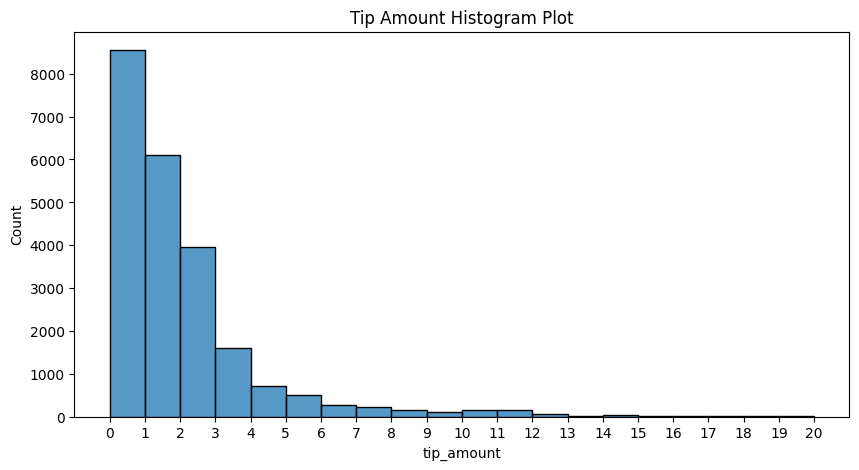

In [13]:
#histogram for `tip_amount`
plt.figure(figsize=(10, 5))
ax = sns.histplot(df['tip_amount'], bins=range(0, 21, 1))

ax.set_xticks(range(0, 21, 1))
ax.set_xticklabels(range(0, 21, 1))
plt.title('Tip Amount Histogram Plot')

In [ ]:
#observations:
#1. The tip amount is skewed towards the right side, with tips decreasing as the amount increases
#2. The popular tip amount ranges between $0-3

Text(0.5, 1.0, 'Tip amount by vendor histogram')

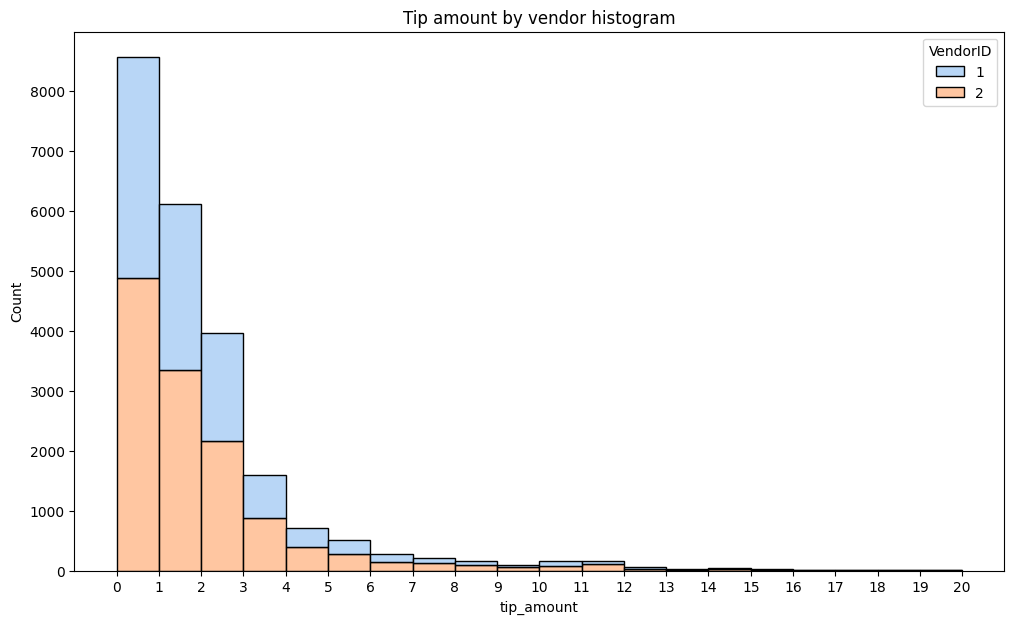

In [14]:
# Histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1),
                  hue='VendorID',
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram')


In [ ]:
#Observations:
#The tip amount is proportional to each vendor

Text(0.5, 1.0, 'Tip amount over $10 by vendor histogram ')

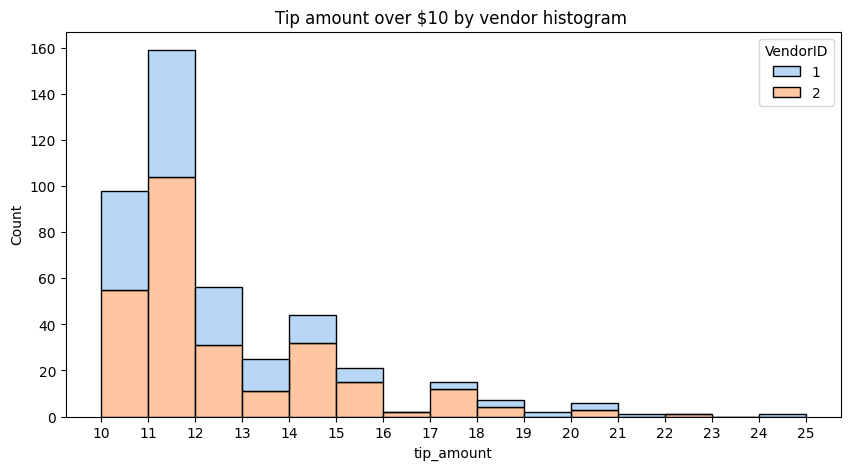

In [15]:
#histogram of `tip_amount` by vendor for tips >$10
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(10,5))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,26,1),
                  hue='VendorID',
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,26,1))
ax.set_xticklabels(range(10,26,1))
plt.title('Tip amount over $10 by vendor histogram ')

In [ ]:
#Observations
#1. The tip amount remains proportional to the vendor and trips

In [16]:
#unique values in `passenger_count`
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

In [ ]:
#observations
#1. There were 33 trip counts with zero passengers - doesn't make sense
#2. One passenger count per trip accounted for the biggest share
#3. Six was the maximum passenger occupancy with a share of 693...close to 700

In [17]:
#mean tips by `passenger_count`. Ensure `mean(numeric_only=True)` as the dat frame contains non-numeric columns
mean_tips_by_passenger_count = df.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']]
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


In [ ]:
#Observations
#1. Zero passengers has a tip_amount value - which is abnormal 

In [ ]:
df.dtypes

C:\Users\Doris\AppData\Local\Temp\ipykernel_23108\2154032381.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index,
C:\Users\Doris\AppData\Local\Temp\ipykernel_23108\2154032381.py:9: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=data.index,


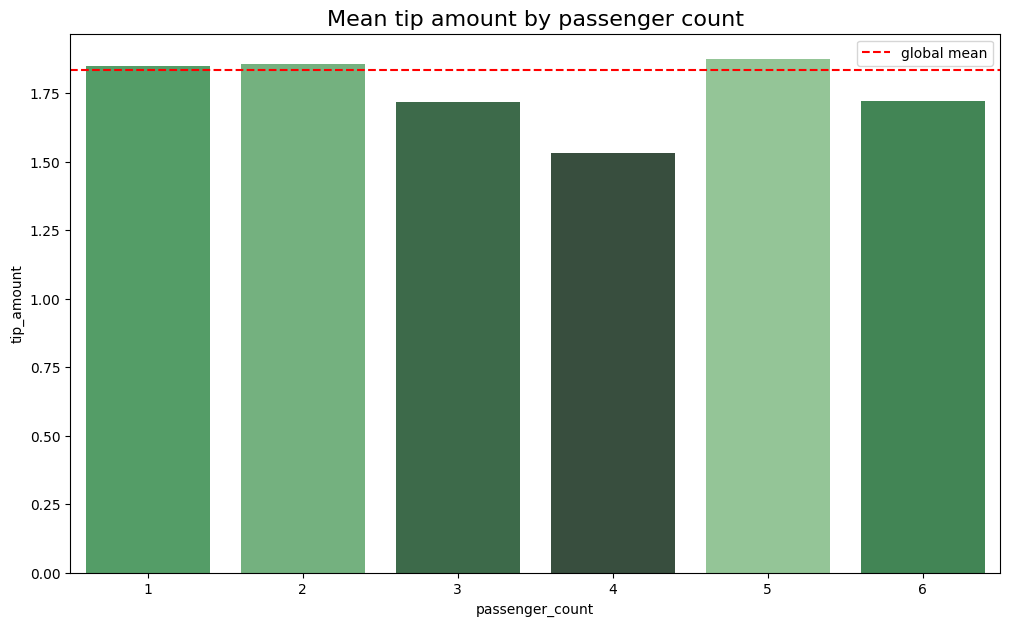

In [18]:
#Bar plot for mean tips by passenger count
from turtle import color


data  = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette('Greens_d', len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
                 y=data['tip_amount'],
                 palette=np.array(pal[::-1])[rank])
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16);

In [ ]:
#observations
#1. mean tip for the passenger count does not vary much, except with the four passenger count, which is less popular anyway

In [19]:
#create `Day` and `Month` columns to visualize the daily and monthly data
#day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
#month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

In [ ]:
#confirm the columns have been created
df.info()

In [21]:
#get total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [22]:
#arrange the months in an orderly way
month_order = ['January', 'February','March','April','May', 'June', 'July','August', 'September',
               'October','November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

In [23]:
#show the index
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='month')

C:\Users\Doris\AppData\Local\Temp\ipykernel_23108\558583227.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index, y=monthly_rides, palette=np.array(pal[::-1]))
C:\Users\Doris\AppData\Local\Temp\ipykernel_23108\558583227.py:9: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=data.index, y=monthly_rides, palette=np.array(pal[::-1]))
C:\Users\Doris\AppData\Local\Temp\ipykernel_23108\558583227.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order)


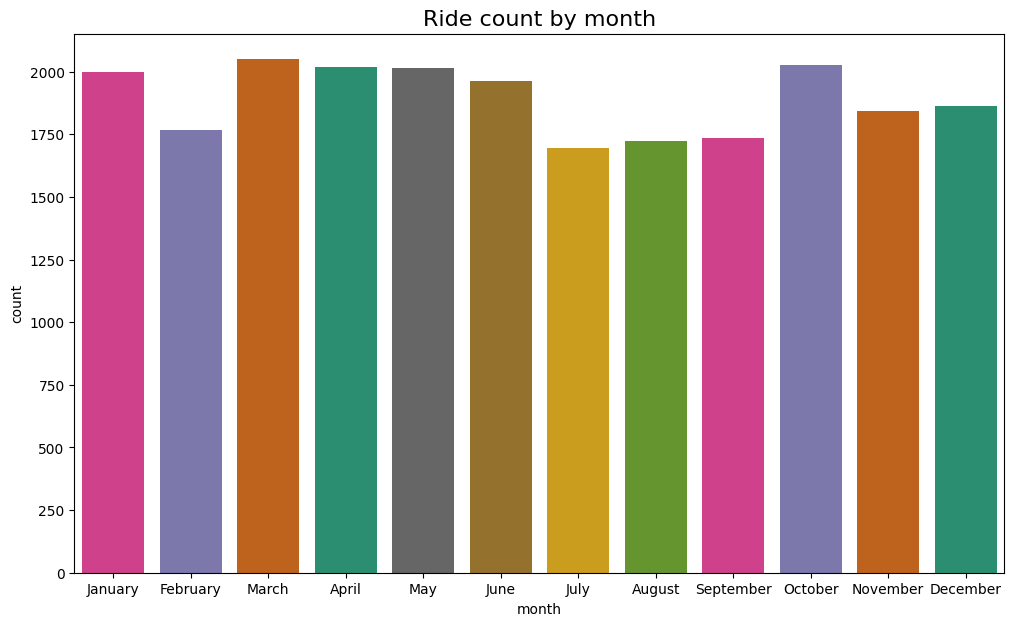

In [34]:
#bar plot for total monthly rides
#from turtle import color

from turtle import colormode
data = monthly_rides
pal = sns.color_palette('Dark2', len(data))

plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index, y=monthly_rides, palette=np.array(pal[::-1]))
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

In [ ]:
#observation
#1. Summer months - July, Aug, Sep - have a dip in the ride count

In [112]:
#Total ride counts by weekday
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

In [ ]:
#observations
#1. Sunday and Monday have few number of rides in a week


C:\Users\Doris\AppData\Local\Temp\ipykernel_13200\1242472210.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


Text(0.5, 1.0, 'Ride count by day')

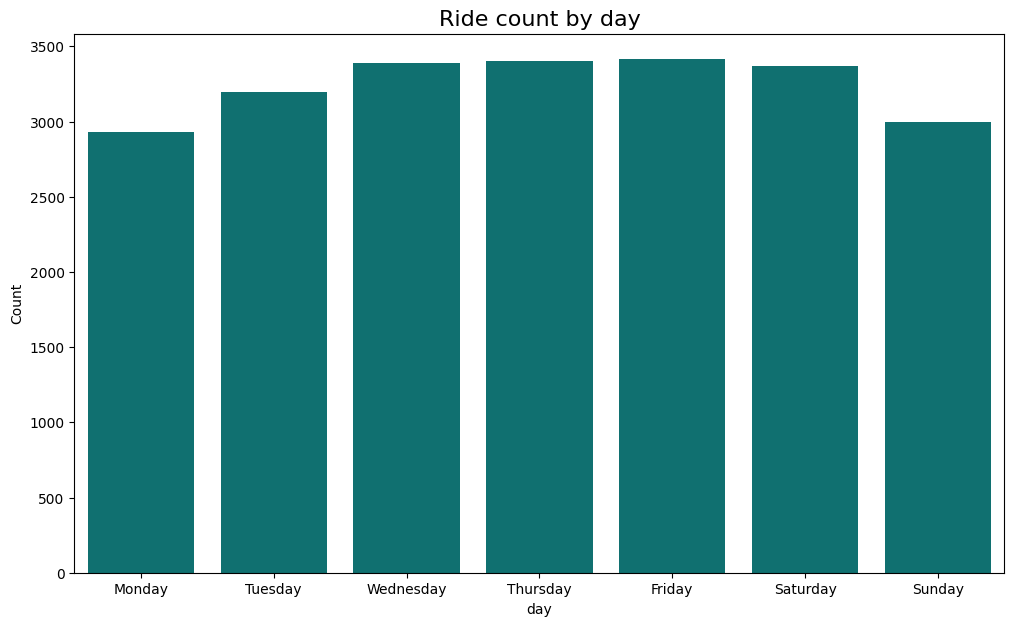

In [116]:
#bar plot for ride count by day

plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides, color='teal')
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=16)

In [36]:
#total revenue by day of week - set sum(numeric_only=True)
day_order = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('day').sum(numeric_only=True)[['total_amount']]
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


C:\Users\Doris\AppData\Local\Temp\ipykernel_23108\988382581.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


Text(0.5, 1.0, 'Total revenue for each day')

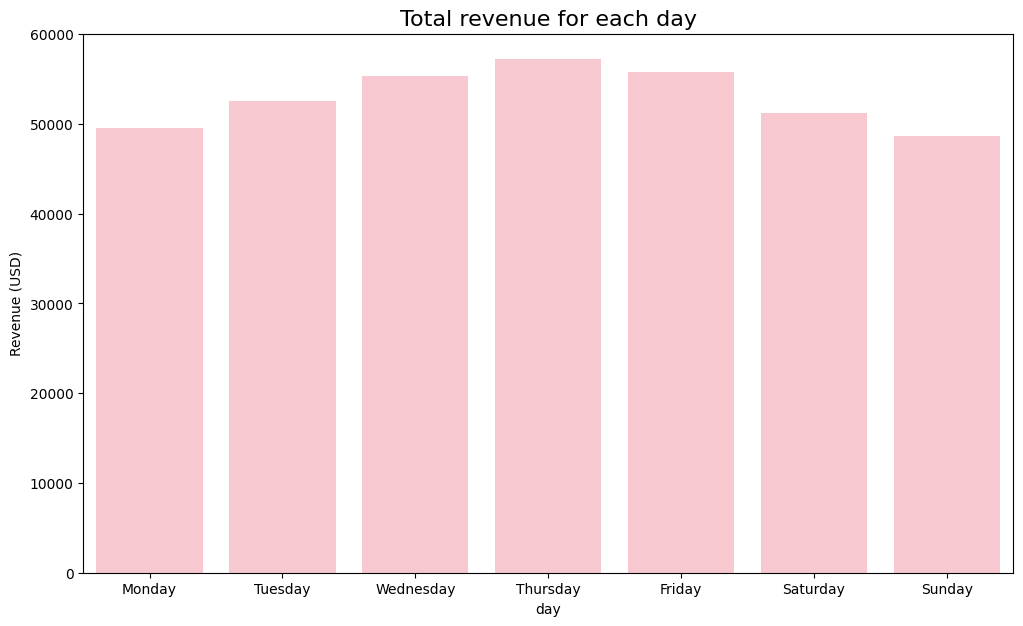

In [55]:
#bar plot of total revenue by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'], color='pink')
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue for each day', fontsize=16)

In [ ]:
#observations
#1. Thursday has the highest revenue in a week
#2. Saturday has slightly less rode counts than Thursday but a considerable dip in the revenue. Probably:
#a. rates are charges lower on weekends

In [37]:
#revenue by Month
total_amount_month = df.groupby('month').sum(numeric_only=True)[['total_amount']]
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


C:\Users\Doris\AppData\Local\Temp\ipykernel_23108\1147208817.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'], palette=np.array(pal[::-1]))
C:\Users\Doris\AppData\Local\Temp\ipykernel_23108\1147208817.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'], palette=np.array(pal[::-1]))


Text(0.5, 1.0, 'Total revenue by Month')

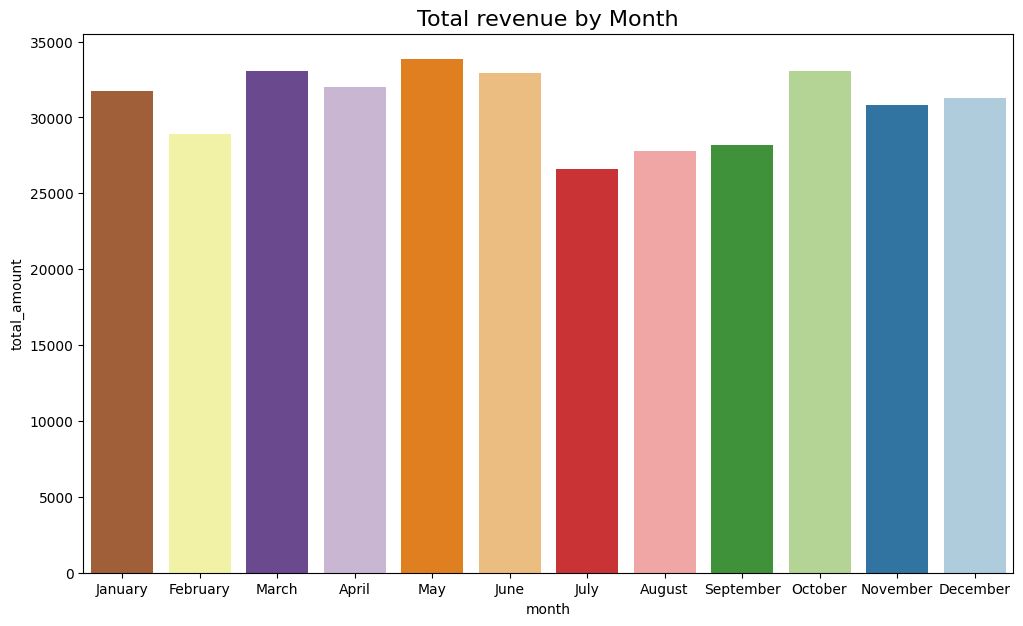

In [39]:
#bar plot for total monthly revenue
#select the color palette
data = total_amount_month
pal = sns.color_palette('Paired', len(data))

plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'], palette=np.array(pal[::-1]))
plt.title('Total revenue by Month', fontsize=16)

In [ ]:
#observations
#1. Summer months(July, Aug, Sep) have a lower revenue amount, and also Feb

In [40]:
#Mean trip distance by drop-off location plot
#get the number of unique drop-off location IDs
df['DOLocationID'].nunique()


216

In [42]:
#calculte th mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID').mean(numeric_only=True)[['trip_distance']]

#sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


In [ ]:
#observations
#1. There are 216 unique drop-off location IDs

C:\Users\Doris\AppData\Local\Temp\ipykernel_23108\1469130788.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=distance_by_dropoff.index,
C:\Users\Doris\AppData\Local\Temp\ipykernel_23108\1469130788.py:8: UserWarning: 
The palette list has fewer values (6) than needed (216) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=distance_by_dropoff.index,


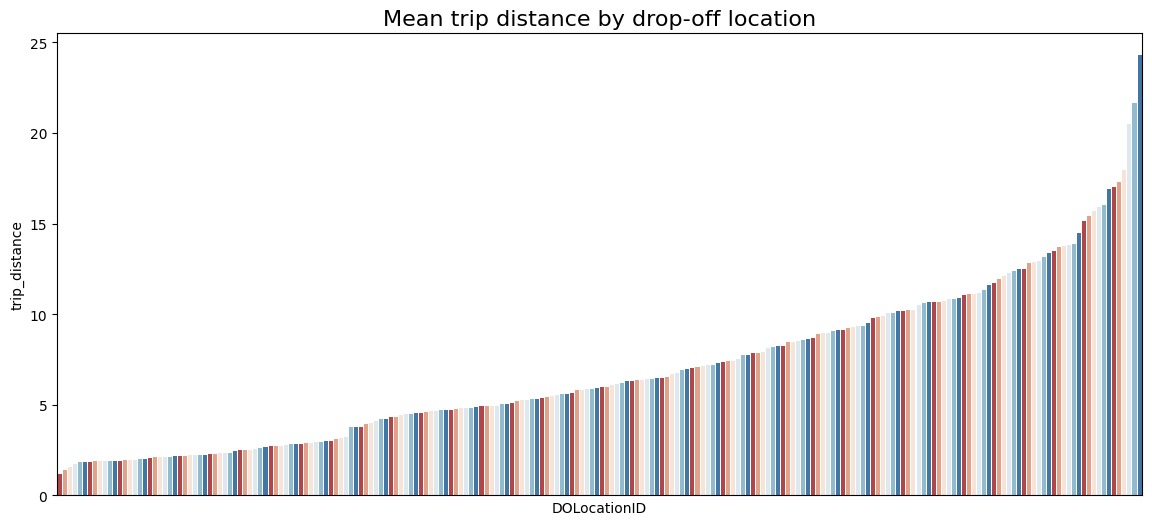

In [45]:
#create a barplot of mean trip distances by drop off location in ascending order by distance
#set the color palette
data = distance_by_dropoff
diverging_colors = sns.color_palette('RdBu')
#pal = sns.color_palette('Paired', len(data))

plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index,
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index,
                 palette=diverging_colors)
ax.set_xticks([])
ax.set_xticklabels([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

ValueError: Names should be list-like for a MultiIndex

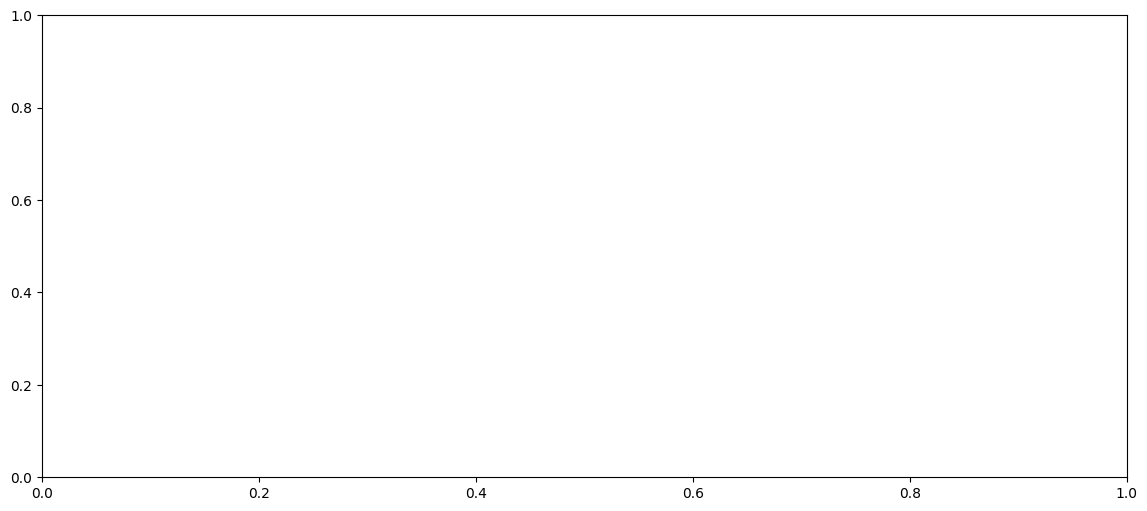

In [48]:
#further experiment to investigate the rides distribution
#1. Create a sample of coordinates - Random points on a 2D plane from a normal distribution
test = np.round(np.random.normal(10,5,(3000,2)),1)
midway = int(len(test)/2) #calculates the midpoint of the array of coordinates
start = test[:midway]  #isolate first half(pick-up locations)
end = test[midway:]   #isloate the secind half(drop-off locations)

#2. calculate Euclidean distances between point in firt half and second half of the array
distances = (start - end)**2
distances = distances.sum(axis=-1)
distances = np.sqrt(distances)

#3. Group the coordinates by 'drop-off location', compute mean distance
test_df = pd.DataFrame({'start': [tuple(x) for x in start.tolist()],
                        'end': [tuple(x) for x in  end.tolist()],
                        'distance' : distances})
data = test_df[['end', 'distance']].groupby('end').mean(numeric_only=True)
data = data.sort_values(by='distance')

#4. Plot the mean distance between each endpoint(drop-off location) and all points it connected to
plt.figure(figsize=(14,6))
ax = sns.barplot(x=data.index,
                 y=data['distance'],
                 order=data.index)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel('Endpoint')
ax.set_ylabel('Mean distance to all other points')
ax.set_title('Mean distance between points taken randomly from normal distribution');

In [49]:
#histogram of drop-off location
#first confirm the drop-off locations IDs are consecutively numbered
#if not consecutively numbered, the histogram will look like some locations have few or no rides when in reality there's 
# no bar because there's no location
df['DOLocationID'].max() - len(set(df['DOLocationID']))

49

Text(0.5, 1.0, 'Hostogram of rides by drop-off location')

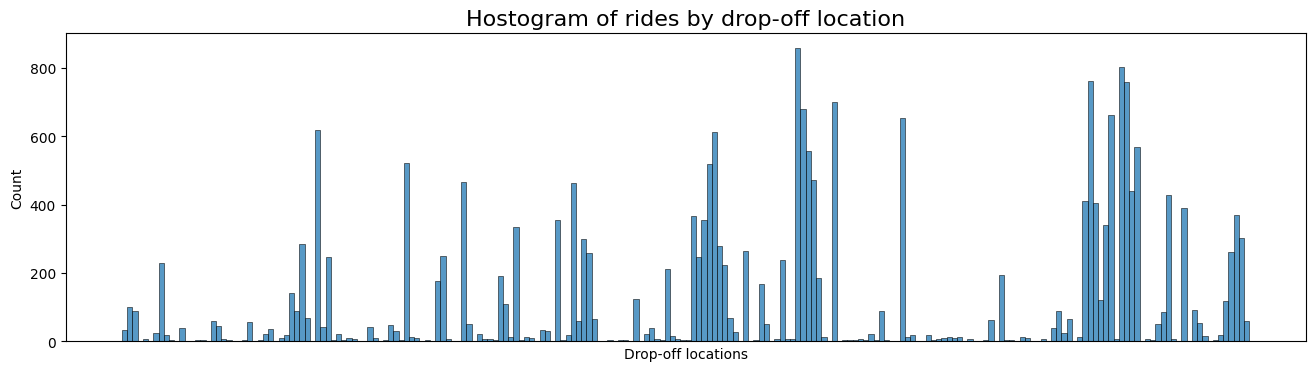

In [50]:
#observation
# There are 49 numbers that do not represent a drop-off location
# Sort the unique drop-off values, then convert them to strings - this will make the histplot function display all bars directly next toeach other
plt.figure(figsize=(16,4))

#DOLocationID column is numeric, sosort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()

#Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')

#plot the histogram
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16)


In [ ]:
#Observations
#There are drop off locations with a high number of rides, probably tourist destinations, schools, airport, etc. The goegraphic 
#coordinates would reveal the exact drop-off location to determine which amenity or facility is within that location

In [ ]:
df.info()

In [52]:
#including the duration of a trip will assist with the model building. Add the trip duration column
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])

In [53]:
#confirm the colum is added
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,day,month,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,Saturday,March,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,Tuesday,April,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,Friday,December,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,Sunday,May,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,Saturday,April,0 days 00:16:43


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Unnamed: 0             22699 non-null  int64          
 1   VendorID               22699 non-null  int64          
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns] 
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns] 
 4   passenger_count        22699 non-null  int64          
 5   trip_distance          22699 non-null  float64        
 6   RatecodeID             22699 non-null  int64          
 7   store_and_fwd_flag     22699 non-null  object         
 8   PULocationID           22699 non-null  int64          
 9   DOLocationID           22699 non-null  int64          
 10  payment_type           22699 non-null  int64          
 11  fare_amount            22699 non-null  float64        
 12  extra                  22699 non-null  float64

In [ ]:
#Conclusion:
#1. There is no missing data
#2. The highest trip distance distribution is below 5 miles
#3. There are outliers to 35 miles
#4. There are several trip distances of 0.0 miles
#5. EDA is important because it helps understand the data, identify missing data, and clean data for future modeling, 